# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. KNN for non linear patterns**

- Implement the K-Nearest Neighbors algorithm for datasets with non linear shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



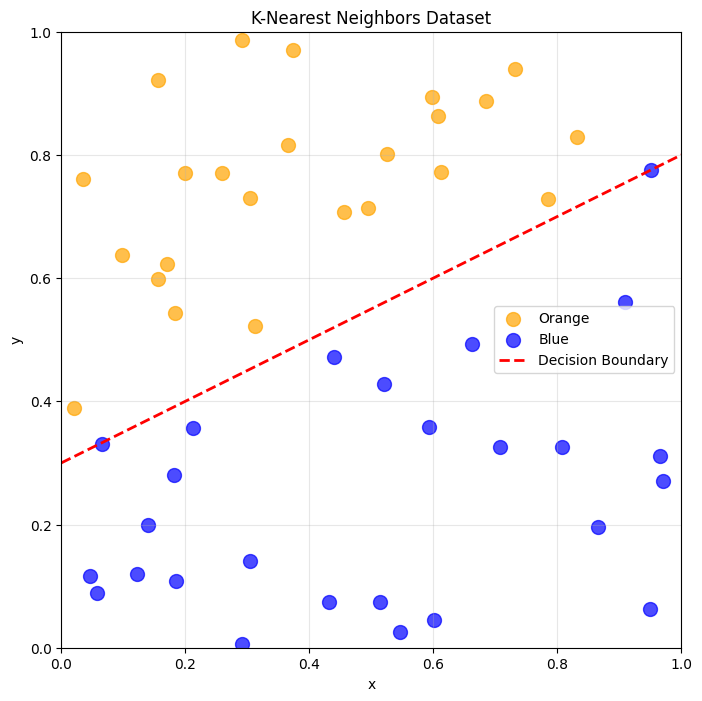

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 random points in a unit square
n = 50
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

# Assign labels based on a boundary rule: points above the line y = 0.5*x + 0.3 are orange, otherwise blue
boundary = 0.5 * x + 0.3
labels = np.where(y > boundary, 'orange', 'blue')

# Store in a structured format (dictionary or structured array)
data = {
    'x': x,
    'y': y,
    'label': labels
}

# Visualize the dataset
plt.figure(figsize=(8, 8))
orange_mask = labels == 'orange'
blue_mask = labels == 'blue'

plt.scatter(x[orange_mask], y[orange_mask], c='orange', label='Orange', s=100, alpha=0.7)
plt.scatter(x[blue_mask], y[blue_mask], c='blue', label='Blue', s=100, alpha=0.7)

# Plot the boundary line
x_boundary = np.linspace(0, 1, 100)
y_boundary = 0.5 * x_boundary + 0.3
plt.plot(x_boundary, y_boundary, 'r--', label='Decision Boundary', linewidth=2)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Nearest Neighbors Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Test point: (0.40, 0.60)

Metric: euclidean
 K= 1 -> predicted: orange | neighbor indices: [46] | coords: [(np.float64(0.31171107608941095), np.float64(0.5227328293819941))]
 K= 3 -> predicted: orange | neighbor indices: [46, 24, 39] | coords: [(np.float64(0.31171107608941095), np.float64(0.5227328293819941)), (np.float64(0.45606998421703593), np.float64(0.7068573438476171)), (np.float64(0.4401524937396013), np.float64(0.4722149251619493))]
 K= 5 -> predicted: orange | neighbor indices: [46, 24, 39, 41, 36] | coords: [(np.float64(0.31171107608941095), np.float64(0.5227328293819941)), (np.float64(0.45606998421703593), np.float64(0.7068573438476171)), (np.float64(0.4401524937396013), np.float64(0.4722149251619493)), (np.float64(0.4951769101112702), np.float64(0.713244787222995)), (np.float64(0.3046137691733707), np.float64(0.7296061783380641))]
 K= 7 -> predicted: orange | neighbor indices: [46, 24, 39, 41, 36, 47, 23] | coords: [(np.float64(0.31171107608941095), np.float64(0.52273282938

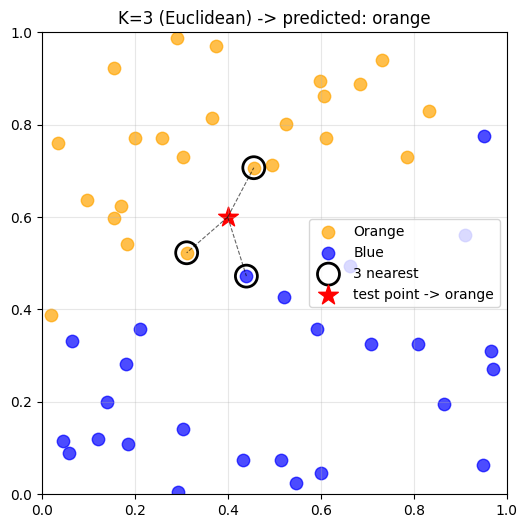

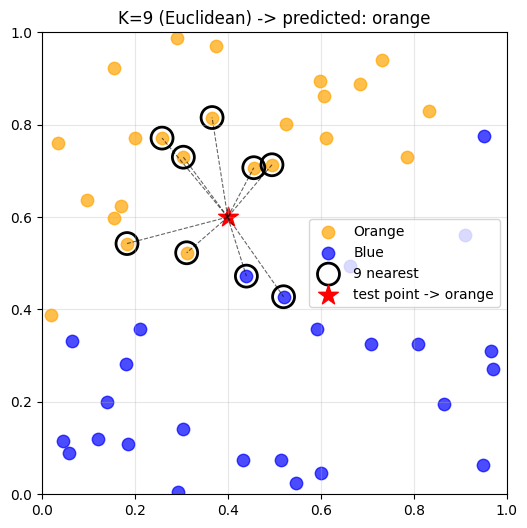

In [20]:
# KNN prediction functions and experiments (uses x, y, labels from previous cell)

def distance(p1, p2, metric='euclidean'):
    if metric == 'euclidean':
        return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    elif metric == 'manhattan':
        return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
    else:
        raise ValueError("Unsupported metric: choose 'euclidean' or 'manhattan'")

def knn_predict(x0, y0, K=3, metric='euclidean'):
    p0 = (x0, y0)
    # compute distances to all points
    dists = np.array([distance(p0, (xi, yi), metric=metric) for xi, yi in zip(x, y)])
    # sort and pick K nearest
    idx_sorted = np.argsort(dists)
    neigh_idx = idx_sorted[:K]
    neigh_labels = labels[neigh_idx]
    # majority vote
    unique, counts = np.unique(neigh_labels, return_counts=True)
    max_count = counts.max()
    candidates = unique[counts == max_count]
    if len(candidates) == 1:
        pred = candidates[0]
    else:
        # tie-breaker: choose label of the closest neighbor
        pred = neigh_labels[0]
    return pred, neigh_idx, dists

# Choose a test point (x0, y0)
x0, y0 = 0.4, 0.6

# Try different K values and both distance metrics
Ks = [1, 3, 5, 7, 9]
print(f"Test point: ({x0:.2f}, {y0:.2f})")
for metric in ('euclidean', 'manhattan'):
    print(f"\nMetric: {metric}")
    for K in Ks:
        pred, neigh_idx, dists = knn_predict(x0, y0, K=K, metric=metric)
        neigh_coords = list(zip(x[neigh_idx], y[neigh_idx]))
        print(f" K={K:2d} -> predicted: {pred:6s} | neighbor indices: {neigh_idx.tolist()} | coords: {neigh_coords}")

# Visualize dataset, test point, and nearest neighbors for two representative Ks
for K in (3, 9):
    pred, neigh_idx, dists = knn_predict(x0, y0, K=K, metric='euclidean')
    plt.figure(figsize=(6,6))
    plt.scatter(x[labels=='orange'], y[labels=='orange'], c='orange', label='Orange', s=80, alpha=0.7)
    plt.scatter(x[labels=='blue'], y[labels=='blue'], c='blue', label='Blue', s=80, alpha=0.7)
    # highlight neighbors
    plt.scatter(x[neigh_idx], y[neigh_idx], facecolors='none', edgecolors='k', s=250, linewidths=2, label=f'{K} nearest')
    # plot test point
    plt.scatter([x0], [y0], c='red', marker='*', s=220, label=f'test point -> {pred}')
    # draw lines to neighbors
    for ni in neigh_idx:
        plt.plot([x0, x[ni]], [y0, y[ni]], 'k--', linewidth=0.8, alpha=0.6)
    plt.title(f'K={K} (Euclidean) -> predicted: {pred}')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

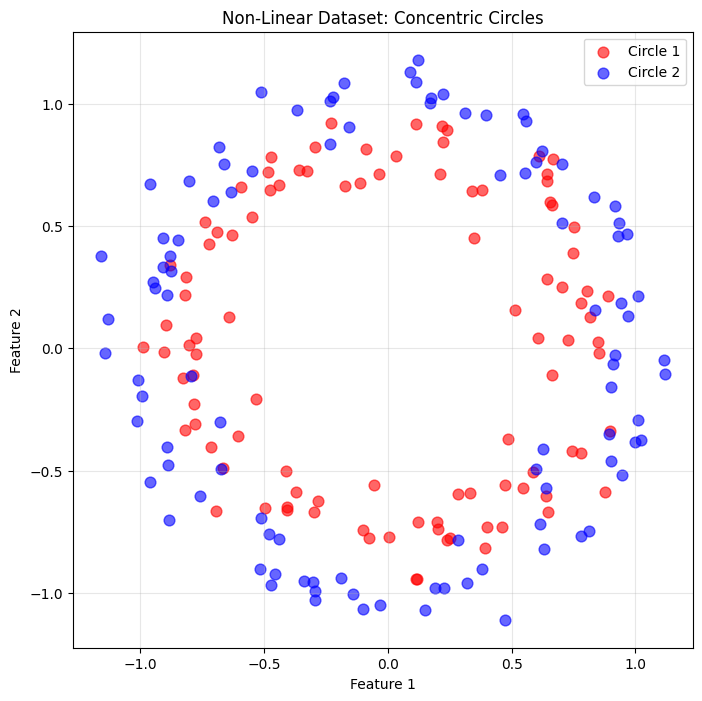

KNN Performance on Non-Linear Dataset (Concentric Circles)
K= 3, Metric=euclidean  | Accuracy: 0.7833 | Precision: 0.7876 | Recall: 0.7833
K= 3, Metric=manhattan  | Accuracy: 0.7833 | Precision: 0.7876 | Recall: 0.7833
K= 5, Metric=euclidean  | Accuracy: 0.7333 | Precision: 0.7465 | Recall: 0.7333
K= 5, Metric=manhattan  | Accuracy: 0.7333 | Precision: 0.7465 | Recall: 0.7333
K= 7, Metric=euclidean  | Accuracy: 0.6833 | Precision: 0.6920 | Recall: 0.6833
K= 7, Metric=manhattan  | Accuracy: 0.7333 | Precision: 0.7465 | Recall: 0.7333
K= 9, Metric=euclidean  | Accuracy: 0.6500 | Precision: 0.6717 | Recall: 0.6500
K= 9, Metric=manhattan  | Accuracy: 0.6500 | Precision: 0.6581 | Recall: 0.6500
K=15, Metric=euclidean  | Accuracy: 0.6667 | Precision: 0.6946 | Recall: 0.6667
K=15, Metric=manhattan  | Accuracy: 0.6667 | Precision: 0.7067 | Recall: 0.6667

Summary: Best Performance
Best Result: K=3, Metric=euclidean
Accuracy: 0.7833, Precision: 0.7876, Recall: 0.7833


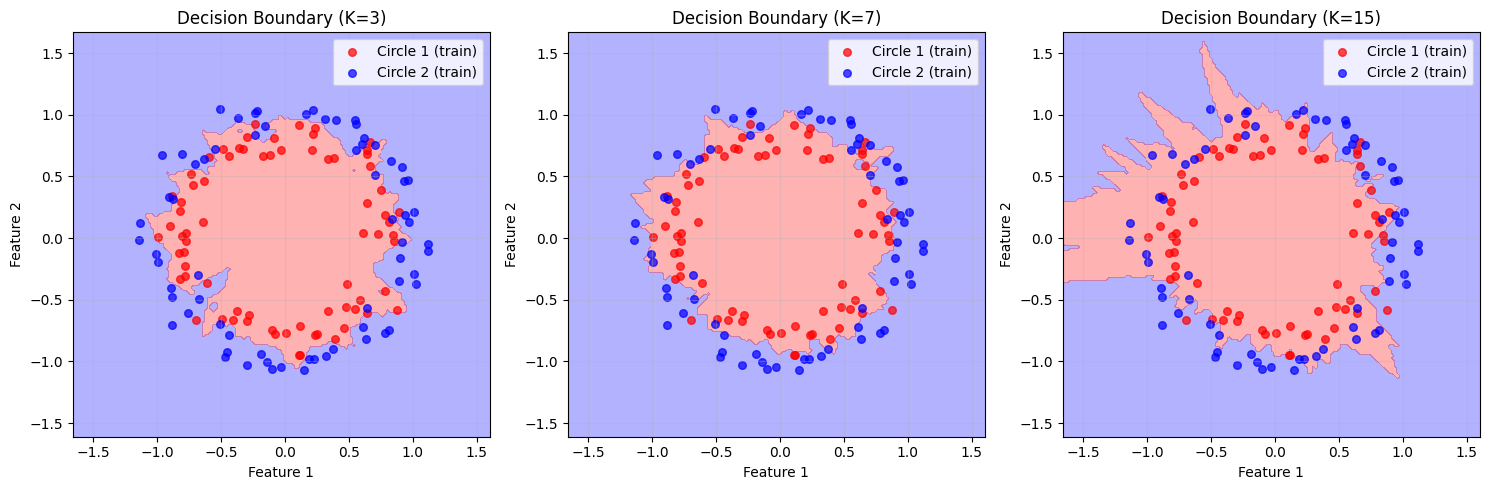


Analysis:
• For non-linear datasets (concentric circles), KNN performs well because it
  captures local decision boundaries without assuming global linearity.
• Smaller K (e.g., 3, 5) captures complexity but may be sensitive to noise.
• Larger K (e.g., 15) smooths the decision boundary, reducing overfitting.
• Euclidean distance generally works better for circular patterns.
• Manhattan distance is more suitable for grid-like or axis-aligned patterns.


In [21]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Generate non-linear dataset (concentric circles)

# Generate concentric circles dataset
n_samples = 200
X_nonlinear, y_nonlinear = make_circles(n_samples=n_samples, noise=0.1, random_state=42)
y_nonlinear = np.where(y_nonlinear == 1, 'circle1', 'circle2')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nonlinear, y_nonlinear, test_size=0.3, random_state=42)

# Visualize the non-linear dataset
plt.figure(figsize=(8, 8))
mask_c1 = y_nonlinear == 'circle1'
mask_c2 = y_nonlinear == 'circle2'
plt.scatter(X_nonlinear[mask_c1, 0], X_nonlinear[mask_c1, 1], c='red', label='Circle 1', alpha=0.6, s=60)
plt.scatter(X_nonlinear[mask_c2, 0], X_nonlinear[mask_c2, 1], c='blue', label='Circle 2', alpha=0.6, s=60)
plt.title('Non-Linear Dataset: Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Implement KNN classifier for non-linear data
def knn_classify_batch(X_train, y_train, X_test, K=5, metric='euclidean'):
    """Classify a batch of test points using KNN"""
    predictions = []
    for test_point in X_test:
        # Compute distances to all training points
        if metric == 'euclidean':
            dists = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        elif metric == 'manhattan':
            dists = np.sum(np.abs(X_train - test_point), axis=1)
        else:
            raise ValueError("Unsupported metric")
        
        # Find K nearest neighbors
        nearest_idx = np.argsort(dists)[:K]
        nearest_labels = y_train[nearest_idx]
        
        # Majority vote
        unique, counts = np.unique(nearest_labels, return_counts=True)
        pred = unique[np.argmax(counts)]
        predictions.append(pred)
    
    return np.array(predictions)

# Test with different K values and distance metrics
print("=" * 70)
print("KNN Performance on Non-Linear Dataset (Concentric Circles)")
print("=" * 70)

results = []
for K in [3, 5, 7, 9, 15]:
    for metric in ['euclidean', 'manhattan']:
        y_pred = knn_classify_batch(X_train, y_train, X_test, K=K, metric=metric)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, labels=['circle1', 'circle2'], average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, labels=['circle1', 'circle2'], average='weighted', zero_division=0)
        
        results.append({'K': K, 'Metric': metric, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})
        print(f"K={K:2d}, Metric={metric:10s} | Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")

# Create a results dataframe
results_df = pd.DataFrame(results)
print("\n" + "=" * 70)
print("Summary: Best Performance")
print("=" * 70)
best_result = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Best Result: K={int(best_result['K'])}, Metric={best_result['Metric']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}, Precision: {best_result['Precision']:.4f}, Recall: {best_result['Recall']:.4f}")

# Visualize decision boundaries for different K values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
K_values = [3, 7, 15]

for idx, K in enumerate(K_values):
    # Create a mesh for decision boundary
    h = 0.02
    x_min, x_max = X_nonlinear[:, 0].min() - 0.5, X_nonlinear[:, 0].max() + 0.5
    y_min, y_max = X_nonlinear[:, 1].min() - 0.5, X_nonlinear[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_pred = knn_classify_batch(X_train, y_train, mesh_points, K=K, metric='euclidean')
    mesh_pred_binary = np.where(mesh_pred == 'circle1', 1, 0).reshape(xx.shape)
    
    # Plot decision boundary
    axes[idx].contourf(xx, yy, mesh_pred_binary, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
    
    # Plot data points
    mask_c1_train = y_train == 'circle1'
    mask_c2_train = y_train == 'circle2'
    axes[idx].scatter(X_train[mask_c1_train, 0], X_train[mask_c1_train, 1], c='red', s=30, alpha=0.7, label='Circle 1 (train)')
    axes[idx].scatter(X_train[mask_c2_train, 0], X_train[mask_c2_train, 1], c='blue', s=30, alpha=0.7, label='Circle 2 (train)')
    
    axes[idx].set_title(f'Decision Boundary (K={K})')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Analysis:")
print("=" * 70)
print("• For non-linear datasets (concentric circles), KNN performs well because it")
print("  captures local decision boundaries without assuming global linearity.")
print("• Smaller K (e.g., 3, 5) captures complexity but may be sensitive to noise.")
print("• Larger K (e.g., 15) smooths the decision boundary, reducing overfitting.")
print("• Euclidean distance generally works better for circular patterns.")
print("• Manhattan distance is more suitable for grid-like or axis-aligned patterns.")

---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$).

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



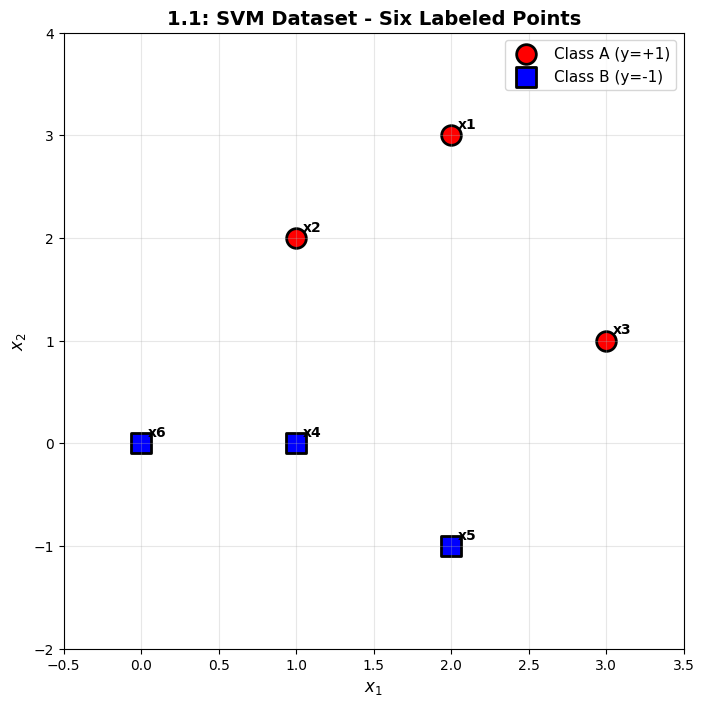

1.2 & 1.3: Linear Separability Analysis
The two classes appear to form distinct clusters:
  • Class A (y=+1): points at (2,3), (1,2), (3,1) - upper right region
  • Class B (y=-1): points at (1,0), (2,-1), (0,0) - lower left region

The classes ARE LINEARLY SEPARABLE - a line can separate them.
This simplifies the classification problem to a linear one.

1.4 & 1.5: Margin and its Importance
MARGIN: The perpendicular distance between the decision boundary
        and the nearest data points (support vectors) on either side.

WHY MAXIMIZE MARGIN:
  • Larger margin → better generalization to new data
  • Small margin → high sensitivity to noise and misclassification
  • Maximizing margin reduces overfitting and improves robustness



In [22]:
from sklearn.svm import SVC

import matplotlib.patches as mpatches

# Define the SVM dataset
X_svm = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y_svm = np.array([1, 1, 1, -1, -1, -1])

# 1.1: Plot the six points
plt.figure(figsize=(8, 8))
pos_mask = y_svm == 1
neg_mask = y_svm == -1

plt.scatter(X_svm[pos_mask, 0], X_svm[pos_mask, 1], c='red', s=200, marker='o', label='Class A (y=+1)', edgecolors='k', linewidth=2)
plt.scatter(X_svm[neg_mask, 0], X_svm[neg_mask, 1], c='blue', s=200, marker='s', label='Class B (y=-1)', edgecolors='k', linewidth=2)

# Add point labels
for i, (x, y) in enumerate(X_svm):
    plt.annotate(f'x{i+1}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('1.1: SVM Dataset - Six Labeled Points', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 3.5)
plt.ylim(-2, 4)
plt.show()

# 1.3: Check linear separability and sketch decision boundary
print("=" * 70)
print("1.2 & 1.3: Linear Separability Analysis")
print("=" * 70)
print("The two classes appear to form distinct clusters:")
print("  • Class A (y=+1): points at (2,3), (1,2), (3,1) - upper right region")
print("  • Class B (y=-1): points at (1,0), (2,-1), (0,0) - lower left region")
print("\nThe classes ARE LINEARLY SEPARABLE - a line can separate them.")
print("This simplifies the classification problem to a linear one.\n")

# 1.4 & 1.5: Margin explanation
print("=" * 70)
print("1.4 & 1.5: Margin and its Importance")
print("=" * 70)
print("MARGIN: The perpendicular distance between the decision boundary")
print("        and the nearest data points (support vectors) on either side.")
print("\nWHY MAXIMIZE MARGIN:")
print("  • Larger margin → better generalization to new data")
print("  • Small margin → high sensitivity to noise and misclassification")
print("  • Maximizing margin reduces overfitting and improves robustness\n")

Beta = [1, -1], beta0 = 0
 x1=         [2, 3] y1=+1 --> y*(beta^T x + b) = -1.000  VIOLATION
 x2=         [1, 2] y2=+1 --> y*(beta^T x + b) = -1.000  VIOLATION
 x3=         [3, 1] y3=+1 --> y*(beta^T x + b) = 2.000  OK
 x4=         [1, 0] y4=-1 --> y*(beta^T x + b) = -1.000  VIOLATION
 x5=        [2, -1] y5=-1 --> y*(beta^T x + b) = -3.000  VIOLATION
 x6=         [0, 0] y6=-1 --> y*(beta^T x + b) = -0.000  VIOLATION


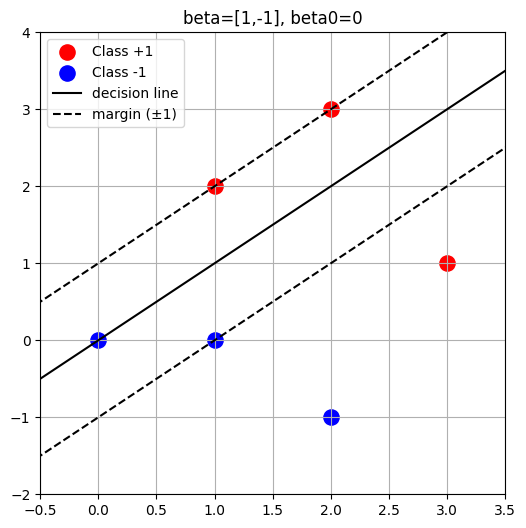



Beta = [2, 2], beta0 = -4
 x1=         [2, 3] y1=+1 --> y*(beta^T x + b) = 6.000  OK
 x2=         [1, 2] y2=+1 --> y*(beta^T x + b) = 2.000  OK
 x3=         [3, 1] y3=+1 --> y*(beta^T x + b) = 4.000  OK
 x4=         [1, 0] y4=-1 --> y*(beta^T x + b) = 2.000  OK
 x5=        [2, -1] y5=-1 --> y*(beta^T x + b) = 2.000  OK
 x6=         [0, 0] y6=-1 --> y*(beta^T x + b) = 4.000  OK

||beta|| = 2.828 -> Margin length M = 1/||beta|| = 0.354


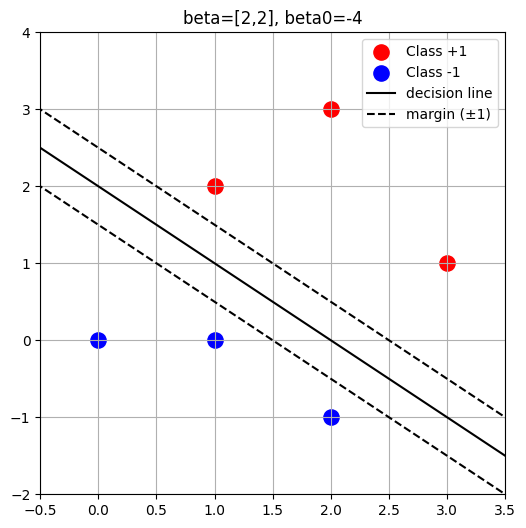


Analysis: Compare the two sets above: larger ||beta|| => smaller margin. See printed M for beta2.

Sklearn linear SVC result:
 beta (coef_) = [0.49984 0.99968]
 beta0 (intercept_) = -1.499413
 ||beta|| = 1.117676 -> Margin M = 0.894713
 Support vectors indices (in training data): [3 1 2]


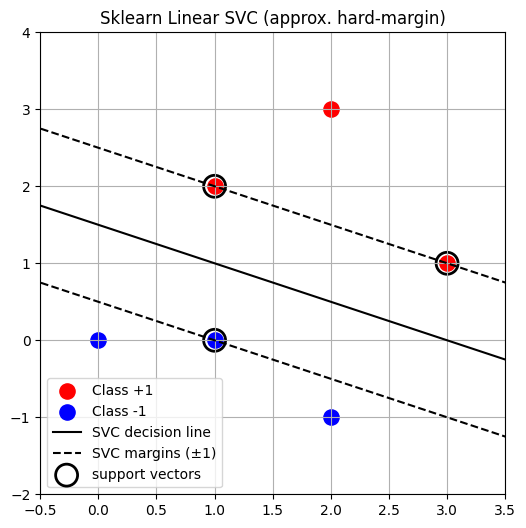

In [23]:
# Check SVM hard-margin constraints, visualize given betas, and fit sklearn SVM (uses X_svm, y_svm, plt, np, SVC)

# 2.1 & 2.3: margin constraint check function
def check_constraints(X, y, beta, beta0):
    vals = y * (X.dot(beta) + beta0)
    satisfied = vals >= 1
    return vals, satisfied

# Points and labels from earlier cell: X_svm, y_svm (y in {+1,-1})
points = X_svm
labels_svm = y_svm

# Beta set 1
beta1 = np.array([1.0, -1.0])
beta0_1 = 0.0
vals1, sat1 = check_constraints(points, labels_svm, beta1, beta0_1)
print("Beta = [1, -1], beta0 = 0")
for i, (xi, yi, v, s) in enumerate(zip(points, labels_svm, vals1, sat1), start=1):
    print(f" x{i}={str(xi.tolist()):>15} y{i}={int(yi):+d} --> y*(beta^T x + b) = {v:.3f}  {'OK' if s else 'VIOLATION'}")

# Plot decision line and margins for beta1
plt.figure(figsize=(6,6))
plt.scatter(points[labels_svm==1,0], points[labels_svm==1,1], c='red', s=120, label='Class +1')
plt.scatter(points[labels_svm==-1,0], points[labels_svm==-1,1], c='blue', s=120, label='Class -1')
x_vals = np.linspace(-1, 4, 100)
# decision boundary: beta^T x + b = 0 => beta1*x + beta2*y + b = 0 => y = -(beta1*x + b)/beta2
y_dec = -(beta1[0]*x_vals + beta0_1)/beta1[1]
# margin lines: = ±1
y_margin_pos = -(beta1[0]*x_vals + beta0_1 - 1)/beta1[1]
y_margin_neg = -(beta1[0]*x_vals + beta0_1 + 1)/beta1[1]
plt.plot(x_vals, y_dec, 'k-', label='decision line')
plt.plot(x_vals, y_margin_pos, 'k--', label='margin (±1)')
plt.plot(x_vals, y_margin_neg, 'k--')
plt.xlim(-0.5, 3.5); plt.ylim(-2, 4); plt.legend(); plt.title("beta=[1,-1], beta0=0"); plt.grid(True); plt.show()

print("\n" + "="*60 + "\n")

# 2.4: Beta set 2
beta2 = np.array([2.0, 2.0])
beta0_2 = -4.0
vals2, sat2 = check_constraints(points, labels_svm, beta2, beta0_2)
print("Beta = [2, 2], beta0 = -4")
for i, (xi, yi, v, s) in enumerate(zip(points, labels_svm, vals2, sat2), start=1):
    print(f" x{i}={str(xi.tolist()):>15} y{i}={int(yi):+d} --> y*(beta^T x + b) = {v:.3f}  {'OK' if s else 'VIOLATION'}")

# margin length
norm_beta2 = np.linalg.norm(beta2)
M2 = 1.0 / norm_beta2
print(f"\n||beta|| = {norm_beta2:.3f} -> Margin length M = 1/||beta|| = {M2:.3f}")

# Plot decision line and margins for beta2
plt.figure(figsize=(6,6))
plt.scatter(points[labels_svm==1,0], points[labels_svm==1,1], c='red', s=120, label='Class +1')
plt.scatter(points[labels_svm==-1,0], points[labels_svm==-1,1], c='blue', s=120, label='Class -1')
y_dec2 = -(beta2[0]*x_vals + beta0_2)/beta2[1]
y_margin2_pos = -(beta2[0]*x_vals + beta0_2 - 1)/beta2[1]
y_margin2_neg = -(beta2[0]*x_vals + beta0_2 + 1)/beta2[1]
plt.plot(x_vals, y_dec2, 'k-', label='decision line')
plt.plot(x_vals, y_margin2_pos, 'k--', label='margin (±1)')
plt.plot(x_vals, y_margin2_neg, 'k--')
plt.xlim(-0.5, 3.5); plt.ylim(-2, 4); plt.legend(); plt.title("beta=[2,2], beta0=-4"); plt.grid(True); plt.show()

print("\nAnalysis: Compare the two sets above: larger ||beta|| => smaller margin. See printed M for beta2.\n")

# 2.5: Fit sklearn SVC with linear kernel to find max-margin classifier (hard-margin by large C)
clf = SVC(kernel='linear', C=1e6)   # high C to approximate hard-margin on separable data
clf.fit(X_svm, y_svm)
coef = clf.coef_.flatten()
intercept = clf.intercept_[0]
norm_coef = np.linalg.norm(coef)
margin = 1.0 / norm_coef

print("Sklearn linear SVC result:")
print(f" beta (coef_) = {coef}")
print(f" beta0 (intercept_) = {intercept:.6f}")
print(f" ||beta|| = {norm_coef:.6f} -> Margin M = {margin:.6f}")
print(f" Support vectors indices (in training data): {np.where(np.isin(X_svm, clf.support_).all(axis=1))[0] if False else clf.support_}")

# Plot decision boundary + support vectors
plt.figure(figsize=(6,6))
plt.scatter(points[labels_svm==1,0], points[labels_svm==1,1], c='red', s=120, label='Class +1')
plt.scatter(points[labels_svm==-1,0], points[labels_svm==-1,1], c='blue', s=120, label='Class -1')
# decision line from clf
y_dec_clf = -(coef[0]*x_vals + intercept)/coef[1]
y_margin_clf_pos = -(coef[0]*x_vals + intercept - 1)/coef[1]
y_margin_clf_neg = -(coef[0]*x_vals + intercept + 1)/coef[1]
plt.plot(x_vals, y_dec_clf, 'k-', label='SVC decision line')
plt.plot(x_vals, y_margin_clf_pos, 'k--', label='SVC margins (±1)')
plt.plot(x_vals, y_margin_clf_neg, 'k--')
# support vectors
sv = clf.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=250, facecolors='none', edgecolors='k', linewidths=2, label='support vectors')
plt.xlim(-0.5, 3.5); plt.ylim(-2, 4); plt.legend(); plt.title("Sklearn Linear SVC (approx. hard-margin)"); plt.grid(True); plt.show()


---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


3.1 & 3.2: Slack Variables for Soft-Margin SVM
Using SVM parameters: beta = [0.49984 0.99968], beta0 = -1.499413

x1=            [2, 3] y1=+1  |  y*(β^T x + b)=  2.499  |  ξ1=0.000000  |  Well-classified
x2=            [1, 2] y2=+1  |  y*(β^T x + b)=  1.000  |  ξ2=0.000213  |  Margin violation
x3=            [3, 1] y3=+1  |  y*(β^T x + b)=  1.000  |  ξ3=0.000213  |  Margin violation
x4=            [1, 0] y4=-1  |  y*(β^T x + b)=  1.000  |  ξ4=0.000427  |  Margin violation
x5=           [2, -1] y5=-1  |  y*(β^T x + b)=  1.499  |  ξ5=0.000000  |  Well-classified
x6=            [0, 0] y6=-1  |  y*(β^T x + b)=  1.499  |  ξ6=0.000000  |  Well-classified
x7=            [1, 3] y7=+1  |  y*(β^T x + b)=  1.999  |  ξ7=0.000000  |  Well-classified
x8=           [3, -2] y8=-1  |  y*(β^T x + b)=  1.999  |  ξ8=0.000000  |  Well-classified

3.2: Slack Variables for Well-Classified Points
When a point is well-classified (y_i(β^T x_i + b) ≥ 1), the slack variable ξ_i = 0
This means there is no penalty 

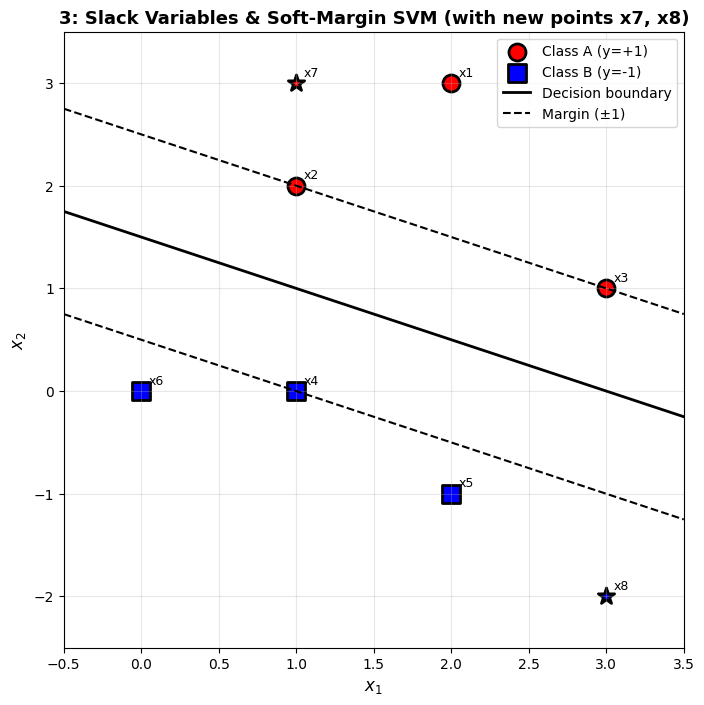

In [24]:
# 3.1, 3.2, 3.3: Slack variables for soft-margin SVM

# Add two new observations
X_svm_extended = np.vstack([X_svm, np.array([[1, 3], [3, -2]])])
y_svm_extended = np.append(y_svm, np.array([1, -1]))

# Use the SVM coefficients from the previous cell
# Compute slack variables using hinge loss: xi_i = max(0, 1 - y_i(beta^T x_i + b))
decision_values = y_svm_extended * (X_svm_extended.dot(coef) + intercept)
slack_variables = np.maximum(0, 1 - decision_values)

print("=" * 80)
print("3.1 & 3.2: Slack Variables for Soft-Margin SVM")
print("=" * 80)
print(f"Using SVM parameters: beta = {coef}, beta0 = {intercept:.6f}\n")

for i, (xi, yi, dv, xi_slack) in enumerate(zip(X_svm_extended, y_svm_extended, decision_values, slack_variables), start=1):
    status = "Well-classified" if xi_slack == 0 else "Margin violation"
    print(f"x{i}={str(xi.tolist()):>18} y{i}={int(yi):+d}  |  "
          f"y*(β^T x + b)={dv:7.3f}  |  ξ{i}={xi_slack:.6f}  |  {status}")

print("\n" + "=" * 80)
print("3.2: Slack Variables for Well-Classified Points")
print("=" * 80)
print("When a point is well-classified (y_i(β^T x_i + b) ≥ 1), the slack variable ξ_i = 0")
print("This means there is no penalty for that point.")

print("\n" + "=" * 80)
print("3.3: Points Violating the Margin")
print("=" * 80)
margin_violations = np.where(slack_variables > 0)[0]
if len(margin_violations) > 0:
    for idx in margin_violations:
        print(f"Point x{idx+1} = {X_svm_extended[idx].tolist()}, y{idx+1} = {int(y_svm_extended[idx]):+d}  "
              f"violates margin with ξ = {slack_variables[idx]:.6f}")
else:
    print("No points violate the margin (perfect separation achieved).")

total_slack = np.sum(slack_variables)
print(f"\nTotal Slack (∑ξ_i) = {total_slack:.6f}")

# Visualize with slack variables
plt.figure(figsize=(8, 8))
plt.scatter(X_svm[y_svm==1, 0], X_svm[y_svm==1, 1], c='red', s=150, marker='o', 
            label='Class A (y=+1)', edgecolors='k', linewidth=2)
plt.scatter(X_svm[y_svm==-1, 0], X_svm[y_svm==-1, 1], c='blue', s=150, marker='s', 
            label='Class B (y=-1)', edgecolors='k', linewidth=2)

# Plot new points
plt.scatter([1], [3], c='red', s=150, marker='*', edgecolors='k', linewidth=2)
plt.scatter([3], [-2], c='blue', s=150, marker='*', edgecolors='k', linewidth=2)

# Add labels
for i, (x, y) in enumerate(X_svm):
    plt.annotate(f'x{i+1}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.annotate('x7', (1, 3), xytext=(5, 5), textcoords='offset points', fontsize=9)
plt.annotate('x8', (3, -2), xytext=(5, 5), textcoords='offset points', fontsize=9)

# Decision boundary
x_vals = np.linspace(-0.5, 3.5, 100)
y_dec_extended = -(coef[0]*x_vals + intercept)/coef[1]
y_margin_pos = -(coef[0]*x_vals + intercept - 1)/coef[1]
y_margin_neg = -(coef[0]*x_vals + intercept + 1)/coef[1]

plt.plot(x_vals, y_dec_extended, 'k-', linewidth=2, label='Decision boundary')
plt.plot(x_vals, y_margin_pos, 'k--', linewidth=1.5, label='Margin (±1)')
plt.plot(x_vals, y_margin_neg, 'k--', linewidth=1.5)

plt.xlim(-0.5, 3.5)
plt.ylim(-2.5, 3.5)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('3: Slack Variables & Soft-Margin SVM (with new points x7, x8)', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

4: Effect of Regularization Parameter C on Soft-Margin SVM


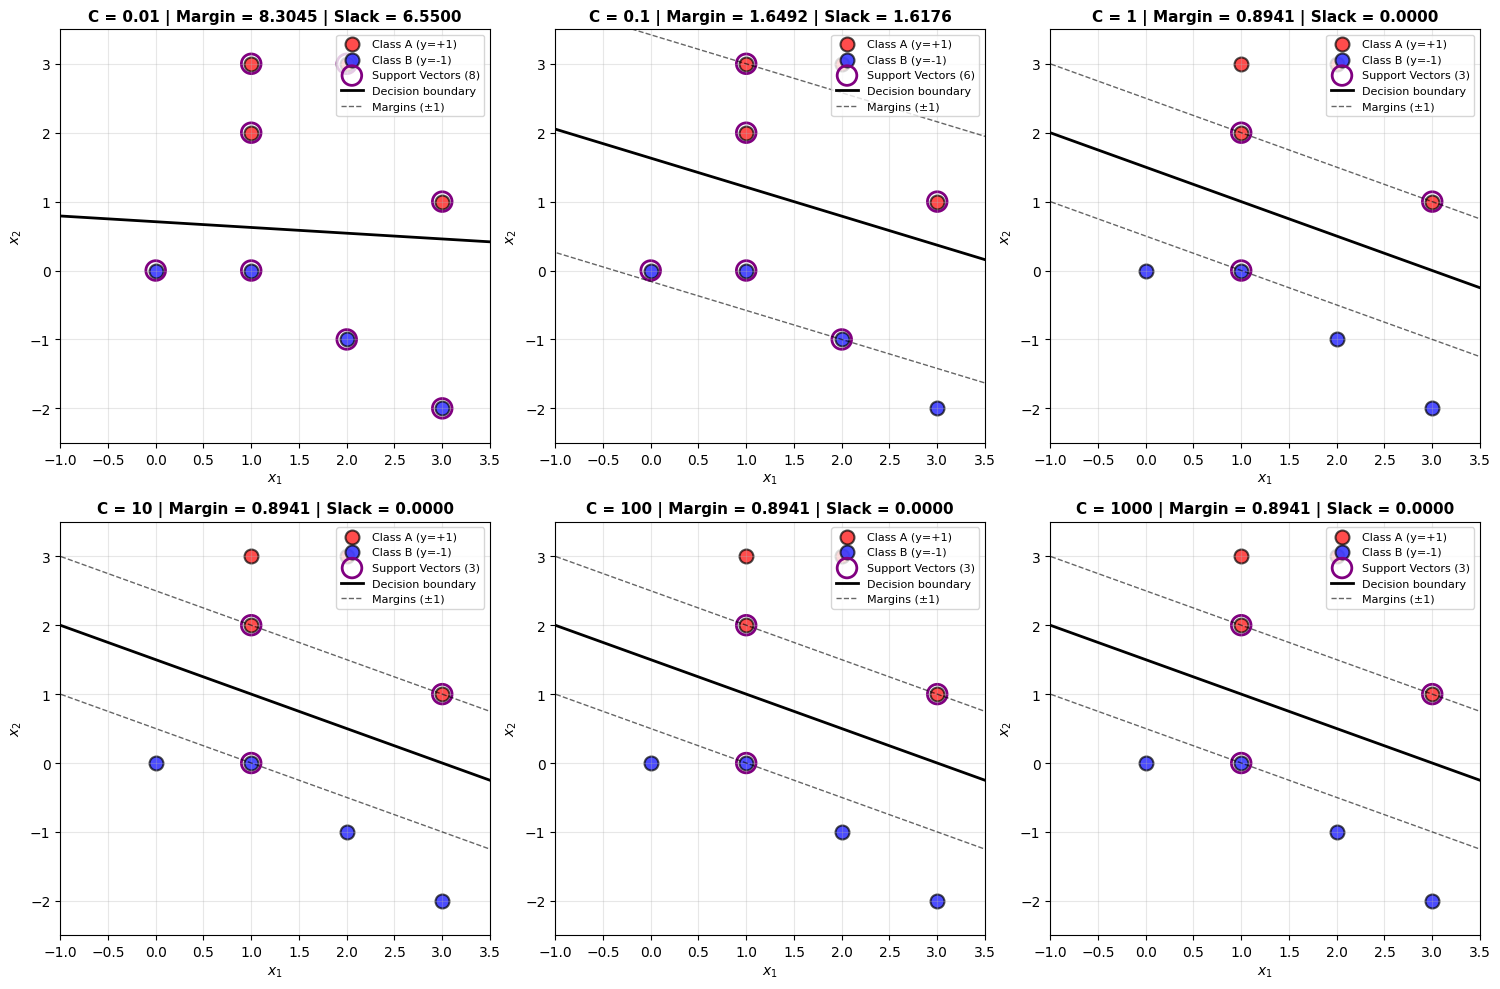


Summary Table: Effect of C Parameter
      C   Margin  Total Slack  Support Vectors  Train Accuracy
   0.01 8.304548     6.550000                8             1.0
   0.10 1.649242     1.617647                6             1.0
   1.00 0.894078     0.000000                3             1.0
  10.00 0.894078     0.000000                3             1.0
 100.00 0.894078     0.000000                3             1.0
1000.00 0.894078     0.000000                3             1.0

ANALYSIS: Effect of C on Margin-Error Trade-off

KEY OBSERVATIONS:

1. **SMALL C (e.g., C=0.01, C=0.1):**
   • Prioritizes LARGE MARGIN over correct classification
   • Allows more slack variables (tolerance for violations)
   • Fewer support vectors → simpler decision boundary
   • HIGHER generalization risk, LOWER training accuracy
   • Margin is LARGER but more misclassifications

2. **LARGE C (e.g., C=100, C=1000):**
   • Prioritizes CORRECT CLASSIFICATION over large margin
   • Penalizes slack variables heavil

In [25]:
# 4: Analyze how C parameter affects the margin-error trade-off

print("=" * 80)
print("4: Effect of Regularization Parameter C on Soft-Margin SVM")
print("=" * 80)

# Test different C values on the extended dataset
C_values = [0.01, 0.1, 1, 10, 100, 1000]
svm_results = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, C in enumerate(C_values):
    # Fit SVM with different C values
    clf_c = SVC(kernel='linear', C=C)
    clf_c.fit(X_svm_extended, y_svm_extended)
    
    coef_c = clf_c.coef_.flatten()
    intercept_c = clf_c.intercept_[0]
    norm_coef_c = np.linalg.norm(coef_c)
    margin_c = 1.0 / norm_coef_c
    
    # Compute slack variables for this model
    decision_vals_c = y_svm_extended * (X_svm_extended.dot(coef_c) + intercept_c)
    slack_vars_c = np.maximum(0, 1 - decision_vals_c)
    total_slack_c = np.sum(slack_vars_c)
    
    # Count support vectors (margin violations)
    n_support_vectors = len(clf_c.support_)
    
    svm_results.append({
        'C': C,
        'Margin': margin_c,
        'Total Slack': total_slack_c,
        'Support Vectors': n_support_vectors,
        'Train Accuracy': clf_c.score(X_svm_extended, y_svm_extended)
    })
    
    # Plot decision boundary for this C
    ax = axes[idx]
    
    # Plot data points
    ax.scatter(X_svm_extended[y_svm_extended==1, 0], X_svm_extended[y_svm_extended==1, 1], 
              c='red', s=100, label='Class A (y=+1)', edgecolors='k', linewidth=1.5, alpha=0.7)
    ax.scatter(X_svm_extended[y_svm_extended==-1, 0], X_svm_extended[y_svm_extended==-1, 1], 
              c='blue', s=100, label='Class B (y=-1)', edgecolors='k', linewidth=1.5, alpha=0.7)
    
    # Plot support vectors
    sv_c = clf_c.support_vectors_
    ax.scatter(sv_c[:, 0], sv_c[:, 1], s=200, facecolors='none', edgecolors='purple', 
              linewidths=2, label=f'Support Vectors ({len(sv_c)})')
    
    # Plot decision boundary and margins
    x_range = np.linspace(-1.5, 3.5, 100)
    if coef_c[1] != 0:
        y_decision = -(coef_c[0]*x_range + intercept_c) / coef_c[1]
        y_margin_pos = -(coef_c[0]*x_range + intercept_c - 1) / coef_c[1]
        y_margin_neg = -(coef_c[0]*x_range + intercept_c + 1) / coef_c[1]
        
        ax.plot(x_range, y_decision, 'k-', linewidth=2, label='Decision boundary')
        ax.plot(x_range, y_margin_pos, 'k--', linewidth=1, alpha=0.6)
        ax.plot(x_range, y_margin_neg, 'k--', linewidth=1, alpha=0.6, label='Margins (±1)')
    
    ax.set_xlim(-1, 3.5)
    ax.set_ylim(-2.5, 3.5)
    ax.set_xlabel('$x_1$', fontsize=10)
    ax.set_ylabel('$x_2$', fontsize=10)
    ax.set_title(f'C = {C} | Margin = {margin_c:.4f} | Slack = {total_slack_c:.4f}', 
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
results_c_df = pd.DataFrame(svm_results)
print("\nSummary Table: Effect of C Parameter")
print(results_c_df.to_string(index=False))

print("\n" + "=" * 80)
print("ANALYSIS: Effect of C on Margin-Error Trade-off")
print("=" * 80)
print("""
KEY OBSERVATIONS:

1. **SMALL C (e.g., C=0.01, C=0.1):**
   • Prioritizes LARGE MARGIN over correct classification
   • Allows more slack variables (tolerance for violations)
   • Fewer support vectors → simpler decision boundary
   • HIGHER generalization risk, LOWER training accuracy
   • Margin is LARGER but more misclassifications

2. **LARGE C (e.g., C=100, C=1000):**
   • Prioritizes CORRECT CLASSIFICATION over large margin
   • Penalizes slack variables heavily → fewer violations tolerated
   • More support vectors → more complex boundary
   • LOWER generalization risk (on this data), HIGHER training accuracy
   • Margin is SMALLER but fewer misclassifications
   • Risk of OVERFITTING on non-separable data

3. **MODERATE C (e.g., C=1, C=10):**
   • Balances between margin maximization and classification error
   • Good trade-off for most practical applications
   • Often provides best generalization to unseen data

MATHEMATICAL INTERPRETATION:
• C → 0: Hard-margin constraint relaxed → Large margin, tolerates errors
• C → ∞: Hard-margin constraint tightened → Attempts perfect separation
• Optimal C depends on: data noise, separability, and regularization goals

PRACTICAL RECOMMENDATION:
Use cross-validation to find optimal C for your specific dataset.
""")